# Study of Zalora Indonesia product list dataset

Following is basic study over zalora dataset. After checking the structure of data, we introduce new variables _impressions_per_sale_last_30days_ and _impressions_per_sale_last_7days_ that serve as dependent variables for modelling attempts.

In discovery phase we couldn't detect any useful relations between features and attempts to fit linear or tree based models were futile as well. This leaves us with the best option to use the same _impressions_per_sale_ score as base of product ranking.

Find more info in README.md

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import math
import itertools

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [3]:
df = pd.read_csv('./products.csv')

# Data Discovery

In [4]:
# display all features with 5 first rows
df[:5].transpose()

,0,1,2,3,4
product_id,254010,257247,259356,260398,261307
colors,green,brown,beige,blue,purple
gender,Female,Female,Male,Female,Female
activated_at,2014-04-11 17:44:47,2014-01-17 12:59:56,2014-01-21 16:34:25,2014-01-23 18:56:40,2014-03-04 17:28:17
season_group,Autumn / Winter,Autumn / Winter,Autumn / Winter,Autumn / Winter,Autumn / Winter
brand,Wardah,Sidewalk,Noir Sur Blanc,Extu,Sanban
original_price,22112,308449,350911,151912,186260
special_price,NaN,119607,279273,75012,89543
sub_cat_type,Cleansers & Toners,Ballerina & Flats,Cardigans & Knitwear,Long Pants,Leggings & Tights
cat_type,Beauty,Shoes,Apparel and Accessories,Apparel and Accessories,Apparel and Accessories


In [5]:
# Number of products in each category type
df.cat_type.value_counts()

Apparel and Accessories    2263
Shoes                      1180
Accessories                 413
Underwear and Swimwear       97
Beauty                       47
dtype: int64

In [6]:
# summaryse net_sale_count by category type
df.groupby('cat_type').net_sale_count.aggregate(['mean', 'median', 'std', 'min', 'max'])

,mean,median,std,min,max
cat_type,,,,,
Accessories,168.985472,170,87.662469,12,430
Apparel and Accessories,178.368537,180,89.767882,12,583
Beauty,184.361702,196,95.920353,25,457
Shoes,178.751695,178,85.688066,13,413
Underwear and Swimwear,188.927835,186,86.487987,24,381


In [7]:
# Products that have been active less than 30 days - total sales count not higher than in last 30 days
print 'Products active less than 30 days: {}'.format( sum(df.net_sale_count <= df.net_sale_count_last_30days) )

Products active less than 30 days: 0


## Add features

In [8]:
# add impressions_per_sale features
df['impressions_per_sale_last_30days'] = df.impressions_count_last_30days / df.net_sale_count_last_30days
df['impressions_per_sale_last_7days'] = df.impressions_count_last_7days / df.net_sale_count_last_7days

print df.impressions_count_last_30days.describe()

count      4000.000000
mean      17577.464500
std       19397.242171
min         147.000000
25%        6059.750000
50%       11336.000000
75%       21937.750000
max      245490.000000
dtype: float64


In [9]:
# Study special_price column
df['has_special_price'] = df.special_price.map(lambda x: not math.isnan(x))
df.has_special_price.value_counts()

True     2337
False    1663
dtype: int64

## Distribution of Impressions per sale 

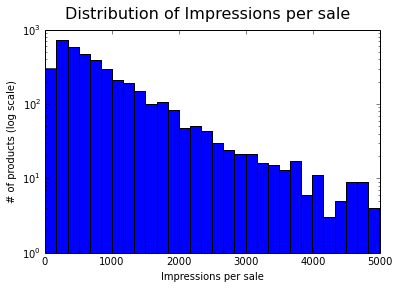

In [10]:
# display distribution of impressions_per_sale 
plt.hist(df[df.impressions_per_sale_last_30days < 5000].impressions_per_sale_last_30days, log=True, bins=30)
plt.suptitle('Distribution of Impressions per sale', fontsize=16)
plt.xlabel('Impressions per sale')
plt.ylabel('# of products (log scale)')
pass

### By attributes

Use histograms to find features where different values split target value into different distributions.
In current dataset this was not found.

In [11]:
def make_histograms(col, max_n=6):
    'Draw histograms of "impressions per sale" for each value of feature `col`'
    
    col_values = df[col].value_counts().keys()[:max_n]
    nrows = int(math.ceil(len(col_values)/2.0))
    fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(12,8))
    
    for ax, col_value in zip(axes.flat, col_values):
        aux = df[(df.impressions_per_sale_last_30days < 5000) & 
                 (df[col] == col_value)].impressions_per_sale_last_30days    
        ax.hist(aux.values, bins=30, log=False)
        ax.set_title(col_value)
        ax.set_xlabel('impressions per sale')
        ax.set_ylabel('# of products')
        
    plt.suptitle('Feature: {}'.format(col), fontsize=16)
#    plt.subplots_adjust()
    plt.tight_layout(rect=(0,0,1,0.95))

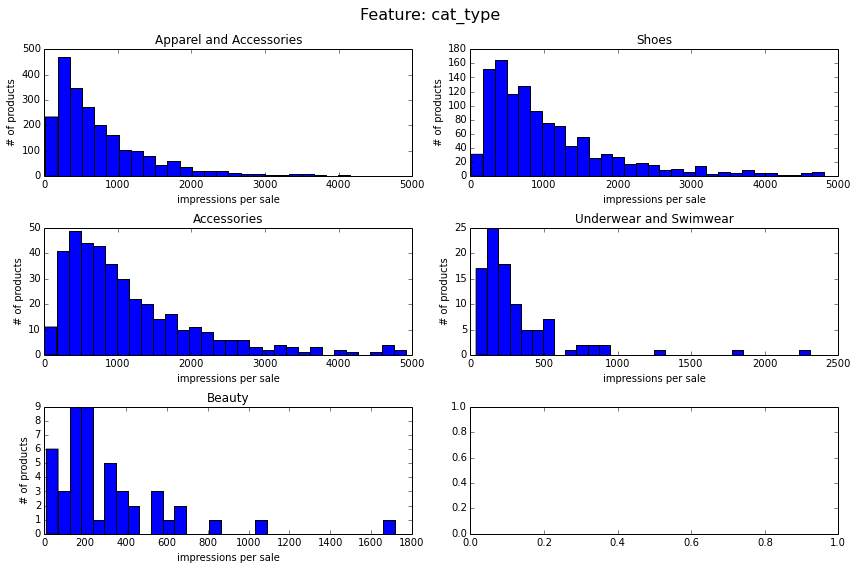

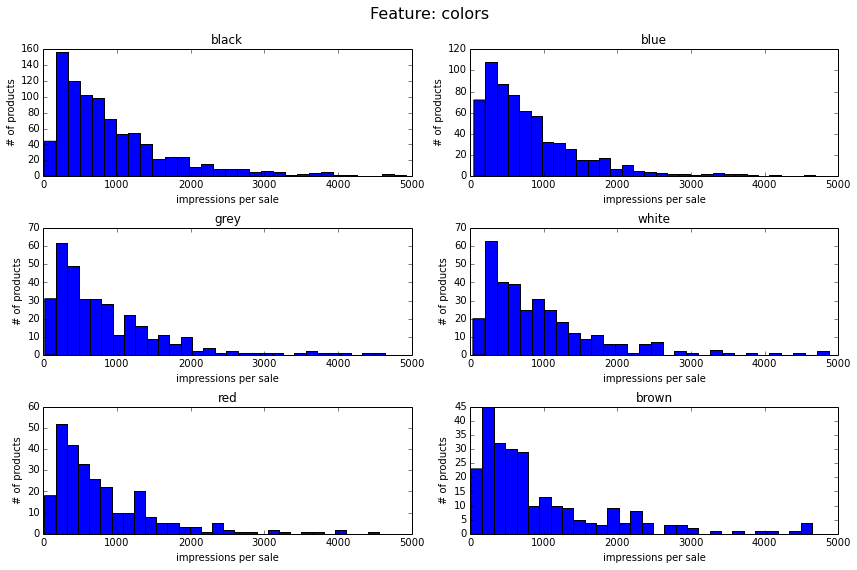

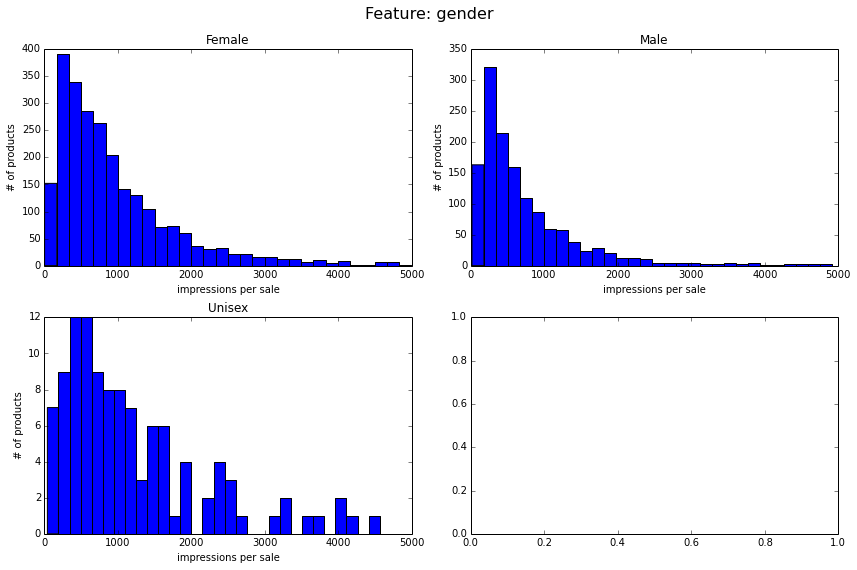

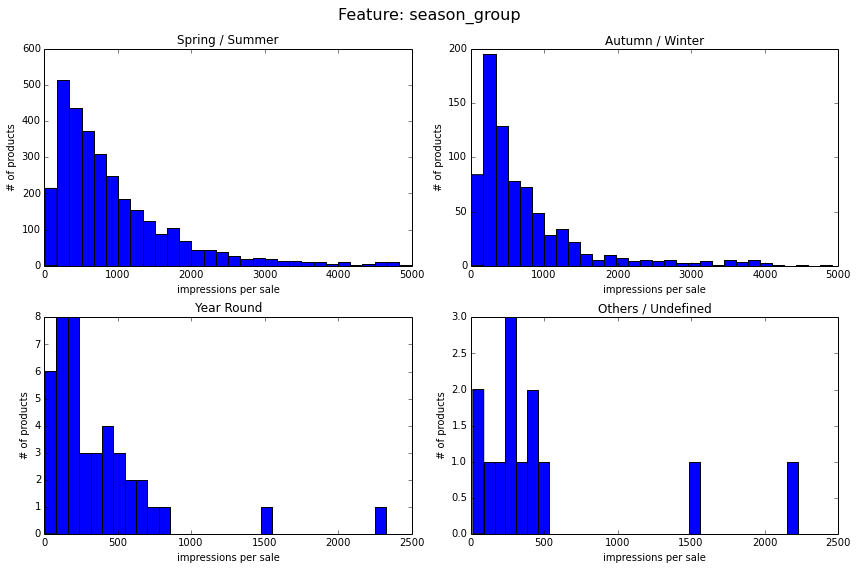

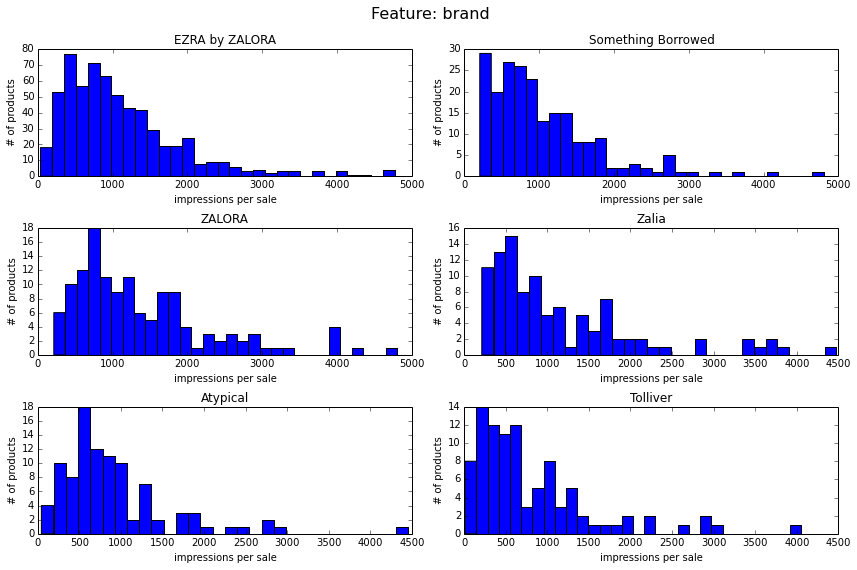

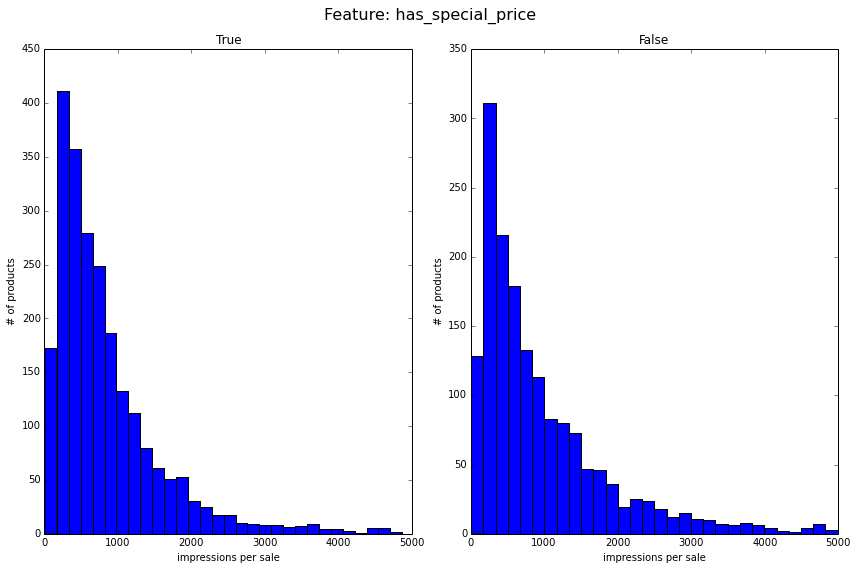

In [12]:
for col in ['cat_type', 'colors', 'gender', 'season_group', 'brand', 'has_special_price']:
    make_histograms(col)
pass

## Correlations between features

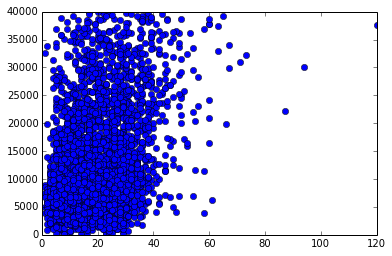

In [13]:
plt.plot(
    df[df.impressions_count_last_30days < 40000].net_sale_count_last_30days, 
    df[df.impressions_count_last_30days < 40000].impressions_count_last_30days, 
    'bo')
pass

In [14]:
def custom_scatter(df_in, x_col , y_col, z_col):
    'Generate scatter plot between 2 features (x_col, y_col) of dataframe. Also colorcode points by 3rd column (x_col)'
    sel = np.array(list(df_in[z_col].values))
    fig = plt.figure(figsize=(16,8))
    plt.scatter(df_in[x_col], df_in[y_col], marker='o', c=sel, s=100, )
    plt.xlabel(x_col)
    plt.ylabel(y_col)

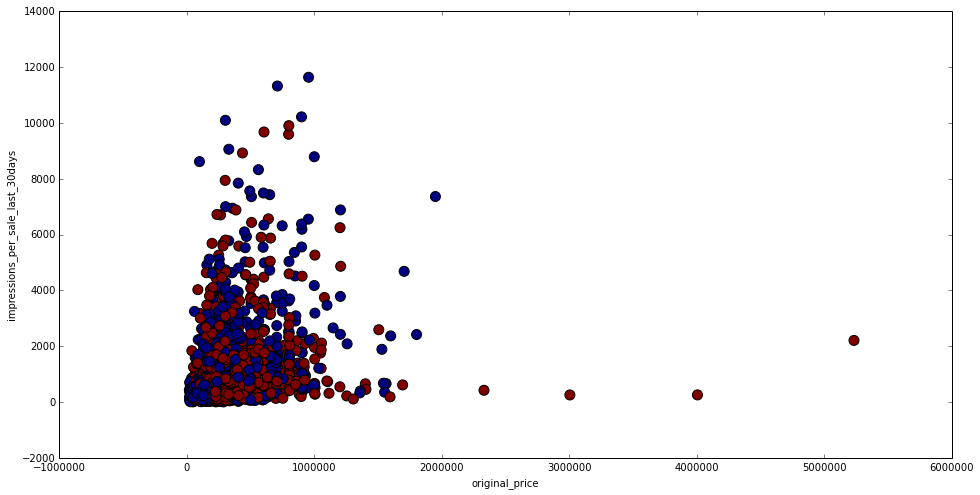

In [15]:
enc = LabelEncoder()
df_tmp = df.copy()
df_tmp.has_special_price = enc.fit_transform(df.has_special_price)
custom_scatter(df_tmp[df_tmp.impressions_per_sale_last_30days < 15000], 
               'original_price', 
               'impressions_per_sale_last_30days', 
               'has_special_price')

# Model Fitting

Attempts to fit data to different regressions models.

In [16]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn import preprocessing

from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cross_validation import train_test_split


def prep_data1(df):
    '''Encode labels and use OneHotEncoder to create binary features'''
    enc1 = preprocessing.LabelEncoder()
    enc2 = preprocessing.OneHotEncoder(sparse=False)
    for col in df:        
        df.loc[:,col] = enc1.fit_transform(df[col])  
    return enc2.fit_transform(df)

def prep_data2(df):
    '''Encode labels into numeric features'''
    enc = preprocessing.LabelEncoder()
    for col in df.columns:
        df.loc[:,col] = enc.fit_transform(df[col])
    return df

def add_23day_vars(df):
    'populate dataset with 23 day period data. This eliminates overlapping between past 7 and 30 day data columns'
    df['impressions_23days'] = df.impressions_count_last_30days - df.impressions_count_last_7days
    df['views_23days'] = df.views_count_last_30days - df.views_count_last_7days
    df['net_sales_23days'] = df.net_sale_count_last_30days - df.net_sale_count_last_7days
    df['rejected_23days'] = df.rejected_returned_sale_count_last_30days - df.rejected_returned_sale_count_last_7days
    df['canceled_23days'] = df.canceled_sale_count_last_30days - df.canceled_sale_count_last_7days
    df['impressions_per_sale_last_7days'] = df.impressions_count_last_7days / df.net_sale_count_last_7days
    df['impressions_per_sale_last_7days'] = df.impressions_per_sale_last_7days.map(lambda x: x if x < np.inf else 20000)
    
    return df

def add_combined_vars(df, independent_vars):
    '''Add all pairwise multiplications of independent_vars to dataframe df
    @param df (DataFrame)
    @param independent_vars (list) of column names in df'''
    
    combinations = list(itertools.combinations(independent_vars, 2))
    for comb in combinations:
        var_name = '_'.join(comb)
        independent_vars.append(var_name)
        df[var_name] = df[comb[0]] * df[comb[1]]
    return df, independent_vars

## Predict future _impressions per sale_ by data from preceding period

Data performs poorly on tested predictive models. RandomForrest model gets clearly overfitted

In [19]:
# Features
independent_vars = ['impressions_23days', 'views_23days', 'net_sales_23days', 'rejected_23days', 'canceled_23days']
dependent_var = 'impressions_per_sale_last_7days'
df_train = add_23day_vars(df)
df_train, independent_vars = add_combined_vars(df_train, independent_vars)

# train test split
df_orig_train, df_orig_test = train_test_split(df, test_size=0.25)
df_orig_train = pd.DataFrame(df_orig_train, columns=df.columns)
df_orig_test = pd.DataFrame(df_orig_test, columns=df.columns)

#params = {'n_estimators': [10,100]}
#clf = GridSearchCV(RandomForestRegressor(), params, cv=3, verbose=10)
clf = RandomForestRegressor(n_estimators=100)
#clf = GradientBoostingRegressor(n_estimators=50)
#clf = ElasticNet()
clf.fit(preprocessing.scale(df_orig_train[independent_vars].applymap(np.float64)), df_orig_train[dependent_var])

print 'Model R^2 score on training data:', clf.score(
                                preprocessing.scale(df_orig_train[independent_vars].applymap(np.float64)),
                                df_orig_train[dependent_var]                                
                                )

# Test
print 'Model R^2 score on test data:', clf.score(
        preprocessing.scale(df_orig_test[independent_vars].applymap(np.float64)),
        df_orig_test[dependent_var]                                
        )

Model R^2 score on training data: 0.851004560427
Model R^2 score on test data: -0.287721833152


## Feature Importance by Linear Model

Linear model, when fit to data gives weights for each input parameter, that shows how 
the specific parameter affects output value.

Below is simple attempt to fit some categorical attributes to ElasticNet model, but it
fits data very poorly, so we can not relay on attribute weights given by model.

In [20]:
# Fit some features to sklearn linear model
#df_train = df[df.cat_type == 'Beauty']
df_train = df
features = ['gender', 'season_group', 'cat_type', 'colors']
features = ['cat_type']
df_tmp = prep_data1(df_train[features])
clf = ElasticNet()
clf.fit(df_tmp, df_train.impressions_per_sale_last_30days)

# Check how much variance of data does the model cover
# We use training data, because we don't want to test the model, but just 
# characterise how well it fits our dataset
#preds = clf.predict(df_tmp)
print 'Model R^2 score:', r2_score(df_train.impressions_per_sale_last_30days, clf.predict(df_tmp))
pass

Model R^2 score: 0.0152920701833


/Users/siim/python/sandbox/lib/python2.7/site-packages/IPython/kernel/__main__.py:17: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame


In [21]:
# print out weights of features
import itertools
attrs_vals = []
for attr in features:
    attrs_vals += itertools.product( [attr], set(df[attr].values) )
    
dfw = pd.DataFrame([attr_val + tuple([w]) for attr_val, w in zip(attrs_vals, clf.coef_)], columns=['col', 'value', 'weight'])
dfw.sort(columns=['col', 'weight'])

,col,value,weight
1,cat_type,Underwear and Swimwear,-88.907435
4,cat_type,Accessories,-30.855320
2,cat_type,Shoes,-14.870227
0,cat_type,Apparel and Accessories,60.151898
3,cat_type,Beauty,75.479843
